<a href="https://colab.research.google.com/github/Jessica0100/data/blob/main/21_209_UAS__jaisyatul_mar'ah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tugas UAS data jaisyatul mar'ah,

di sini saya akan menggunakan data Ecoli yang di dapatkan dari UCI ML,

tahapan pertama yang akan saya lakukan adalah upload data

In [2]:
from google.colab import files

# Upload file ecoli.data
uploaded = files.upload()


Saving ecoli.data to ecoli.data


In [3]:
import pandas as pd

# Baca file ecoli.data
df = pd.read_csv("ecoli.data", delim_whitespace=True, header=None)

# Tampilkan 5 baris pertama
df.head()


/tmp/ipython-input-3-1730801737.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("ecoli.data", delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [4]:
# Rename kolom berdasarkan struktur dataset
df.columns = ['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']

# Lihat struktur data
print("🔹 Jumlah Data:", df.shape)
print("\n🔹 Informasi Data:")
print(df.info())

# Cek jumlah data per kelas
print("\n🔹 Distribusi Kelas:")
print(df['class'].value_counts())


🔹 Jumlah Data: (336, 9)

🔹 Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sequence_name  336 non-null    object 
 1   mcg            336 non-null    float64
 2   gvh            336 non-null    float64
 3   lip            336 non-null    float64
 4   chg            336 non-null    float64
 5   aac            336 non-null    float64
 6   alm1           336 non-null    float64
 7   alm2           336 non-null    float64
 8   class          336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB
None

🔹 Distribusi Kelas:
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: count, dtype: int64


2. data understanding

pada tahap ini, meliputi :

 Melihat dimensi data,
 Menampilkan tipe dan ringkasan tiap kolom,
 Distribusi label (kelas),
 Statistik deskriptif,
 Korelasi antar fitur,
 Visualisasi,

A. stuktur dan ringkasan data

In [5]:
# Tampilkan dimensi data
print(f"Jumlah baris dan kolom: {df.shape}")

# Tipe data tiap kolom
print("\nTipe data:")
print(df.dtypes)

# Cek missing values
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# Cek distribusi label (kelas)
print("\nDistribusi kelas:")
print(df['class'].value_counts())


Jumlah baris dan kolom: (336, 9)

Tipe data:
sequence_name     object
mcg              float64
gvh              float64
lip              float64
chg              float64
aac              float64
alm1             float64
alm2             float64
class             object
dtype: object

Jumlah missing value per kolom:
sequence_name    0
mcg              0
gvh              0
lip              0
chg              0
aac              0
alm1             0
alm2             0
class            0
dtype: int64

Distribusi kelas:
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: count, dtype: int64


B. statistik deskriptif

In [6]:
# Statistik umum semua fitur numerik
print("\nStatistik deskriptif fitur numerik:")
print(df.describe())



Statistik deskriptif fitur numerik:
              mcg         gvh         lip         chg         aac        alm1  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.500060    0.500000    0.495476    0.501488    0.500030    0.500179   
std      0.194634    0.148157    0.088495    0.027277    0.122376    0.215751   
min      0.000000    0.160000    0.480000    0.500000    0.000000    0.030000   
25%      0.340000    0.400000    0.480000    0.500000    0.420000    0.330000   
50%      0.500000    0.470000    0.480000    0.500000    0.495000    0.455000   
75%      0.662500    0.570000    0.480000    0.500000    0.570000    0.710000   
max      0.890000    1.000000    1.000000    1.000000    0.880000    1.000000   

             alm2  
count  336.000000  
mean     0.499732  
std      0.209411  
min      0.000000  
25%      0.350000  
50%      0.430000  
75%      0.710000  
max      0.990000  


C. korelasi antar fitur

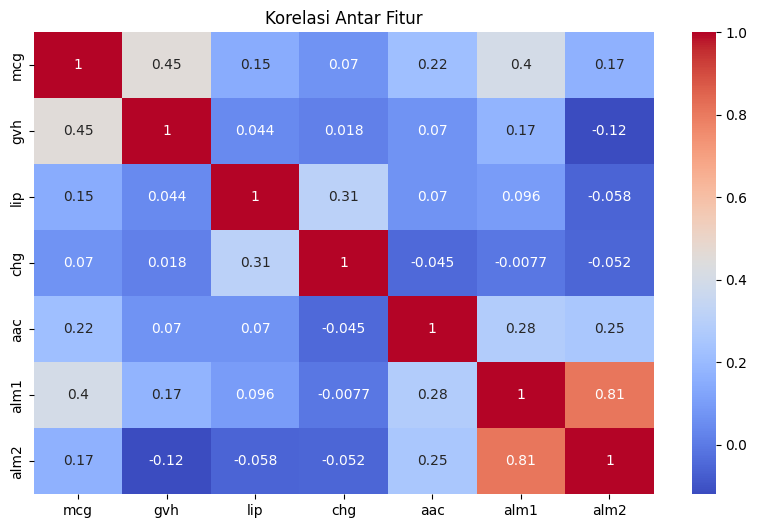

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['sequence_name', 'class']).corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()


D. distribusi setiap fitur

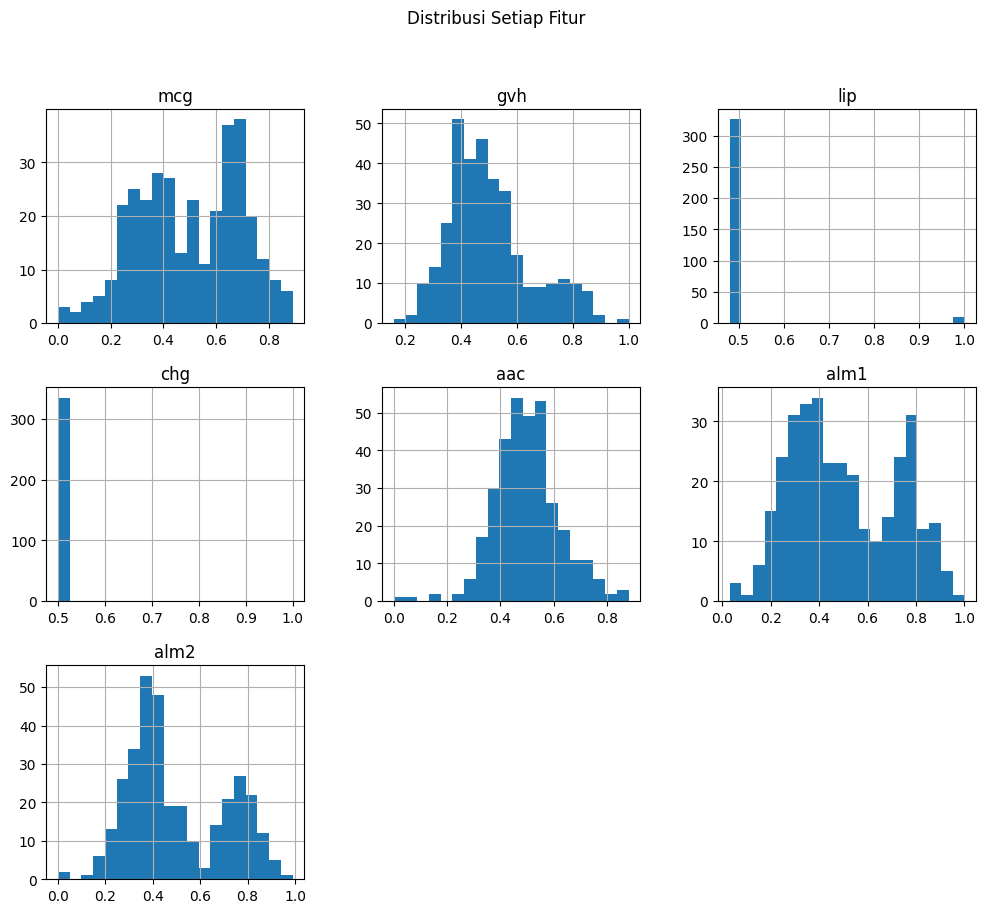

In [8]:
# Histogram setiap fitur numerik
df.drop(columns=['sequence_name', 'class']).hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribusi Setiap Fitur")
plt.show()


E. distribusi kelas

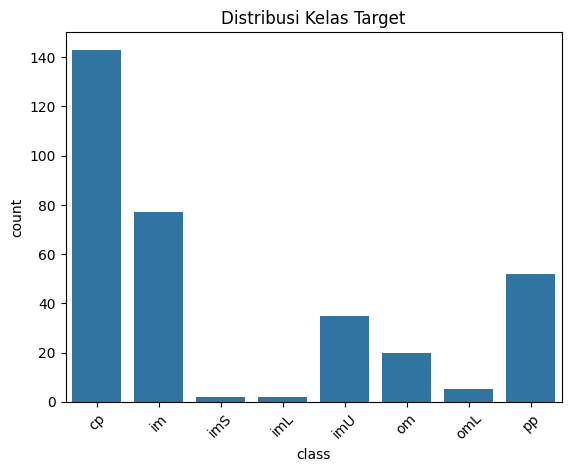

In [9]:
sns.countplot(data=df, x='class')
plt.title("Distribusi Kelas Target")
plt.xticks(rotation=45)
plt.show()


3. prepocessing

A. hapus kolom yang tidak di gunakan

In [10]:
# Hapus kolom sequence_name (tidak relevan untuk model)
df_cleaned = df.drop(columns=['sequence_name'])


B. pisahkan fitur dan label

In [11]:
# Pisahkan fitur dan target
X = df_cleaned.drop(columns=['class'])
y = df_cleaned['class']


C. encode label kelas

In [12]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lihat mapping label
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping label:", label_mapping)


Mapping label: {'cp': np.int64(0), 'im': np.int64(1), 'imL': np.int64(2), 'imS': np.int64(3), 'imU': np.int64(4), 'om': np.int64(5), 'omL': np.int64(6), 'pp': np.int64(7)}


D. normalisasi fitur

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi ke rentang 0-1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


E. split data : train dan test

In [14]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 268
Jumlah data uji: 68


4. modeling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


A. inisialisasi model

In [16]:
# Daftar model yang akan digunakan
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}


B. accuracy

In [17]:
# Simpan hasil akurasi tiap model
model_accuracies = {}

# Melatih dan mengukur akurasi tiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
    print(f"🔹 Model: {name}")
    print(f"✅ Akurasi: {acc:.4f}")
    print("-" * 50)


🔹 Model: Logistic Regression
✅ Akurasi: 0.8824
--------------------------------------------------
🔹 Model: Decision Tree
✅ Akurasi: 0.8088
--------------------------------------------------
🔹 Model: K-Nearest Neighbors
✅ Akurasi: 0.9118
--------------------------------------------------
🔹 Model: SVM
✅ Akurasi: 0.8971
--------------------------------------------------
🔹 Model: Random Forest
✅ Akurasi: 0.8824
--------------------------------------------------


C. akurasi dalam bentuk tabel

In [18]:
# Tampilkan hasil akurasi dalam tabel
import pandas as pd

result_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
result_df = result_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
result_df


,Model,Accuracy
0,K-Nearest Neighbors,0.911765
1,SVM,0.897059
2,Logistic Regression,0.882353
3,Random Forest,0.882353
4,Decision Tree,0.808824


5. evaluasi

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


A. evaluasi detail setiap model


📌 Evaluasi Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

          cp       0.91      1.00      0.95        29
          im       0.86      0.75      0.80        16
         imU       0.62      0.71      0.67         7
          om       1.00      1.00      1.00         4
         omL       1.00      1.00      1.00         1
          pp       1.00      0.82      0.90        11

    accuracy                           0.88        68
   macro avg       0.90      0.88      0.89        68
weighted avg       0.89      0.88      0.88        68



<Figure size 800x600 with 0 Axes>

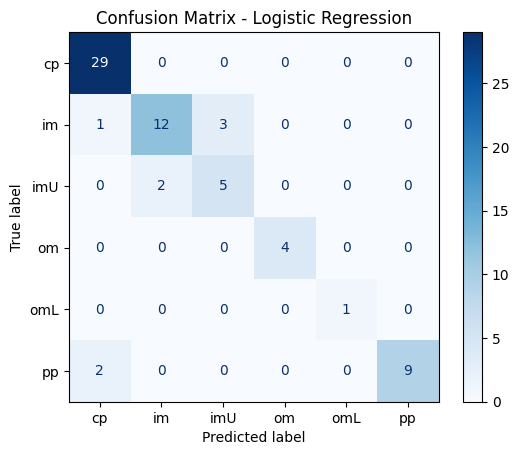


📌 Evaluasi Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

          cp       0.96      0.93      0.95        29
          im       0.77      0.62      0.69        16
         imU       0.43      0.86      0.57         7
          om       1.00      0.75      0.86         4
         omL       0.00      0.00      0.00         1
          pp       0.90      0.82      0.86        11

    accuracy                           0.81        68
   macro avg       0.68      0.66      0.65        68
weighted avg       0.84      0.81      0.81        68



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 800x600 with 0 Axes>

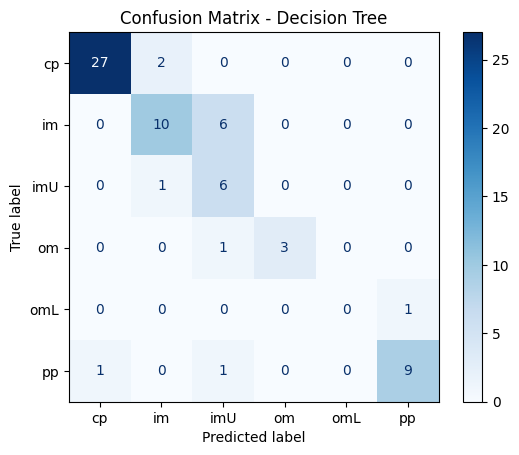


📌 Evaluasi Model: K-Nearest Neighbors
Classification Report:
              precision    recall  f1-score   support

          cp       0.97      1.00      0.98        29
          im       0.92      0.69      0.79        16
         imU       0.60      0.86      0.71         7
          om       1.00      1.00      1.00         4
         omL       1.00      1.00      1.00         1
          pp       1.00      1.00      1.00        11

    accuracy                           0.91        68
   macro avg       0.91      0.92      0.91        68
weighted avg       0.93      0.91      0.91        68



<Figure size 800x600 with 0 Axes>

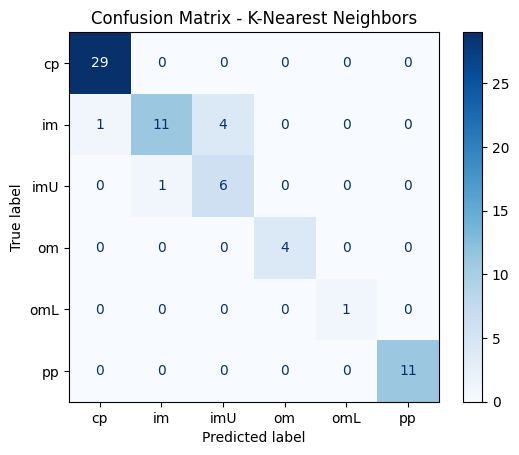


📌 Evaluasi Model: SVM
Classification Report:
              precision    recall  f1-score   support

          cp       0.97      1.00      0.98        29
          im       0.91      0.62      0.74        16
         imU       0.55      0.86      0.67         7
          om       1.00      1.00      1.00         4
         omL       1.00      1.00      1.00         1
          pp       1.00      1.00      1.00        11

    accuracy                           0.90        68
   macro avg       0.90      0.91      0.90        68
weighted avg       0.92      0.90      0.90        68



<Figure size 800x600 with 0 Axes>

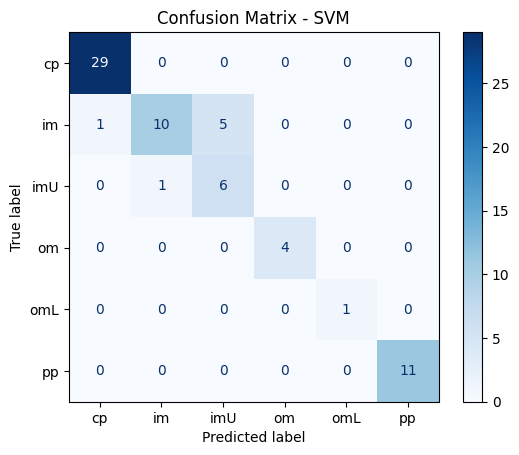


📌 Evaluasi Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

          cp       0.97      1.00      0.98        29
          im       0.91      0.62      0.74        16
         imU       0.50      0.86      0.63         7
          om       1.00      1.00      1.00         4
         omL       1.00      1.00      1.00         1
          pp       1.00      0.91      0.95        11

    accuracy                           0.88        68
   macro avg       0.90      0.90      0.88        68
weighted avg       0.91      0.88      0.89        68



<Figure size 800x600 with 0 Axes>

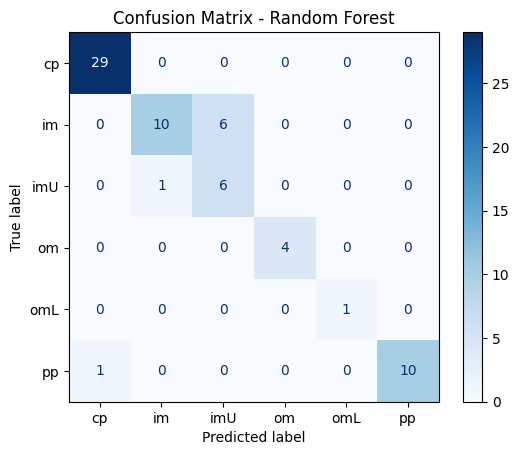

In [21]:
# Loop untuk evaluasi masing-masing model
for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n📌 Evaluasi Model: {name}")
    print("Classification Report:")
    # Get the unique classes present in the test set
    unique_classes_test = np.unique(y_test)
    # Get the corresponding class names from the label encoder
    target_names_test = le.inverse_transform(unique_classes_test)
    print(classification_report(y_test, y_pred, target_names=target_names_test, labels=unique_classes_test))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=unique_classes_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names_test)

    # Visualisasi
    plt.figure(figsize=(8,6)) # Adjusted figure size for better readability
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

B. menentukan model terbaik berdasarkan akurasi

In [22]:
# Menentukan model terbaik
best_model_name = result_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f" Model terbaik berdasarkan akurasi: {best_model_name}")


 Model terbaik berdasarkan akurasi: K-Nearest Neighbors


6. lanjut ke tahap deployment

A. simpan model terbaik ke file.pkl

In [24]:
import pickle

# Simpan model terbaik ke file
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Simpan LabelEncoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Simpan MinMaxScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print(" Model, encoder, dan scaler berhasil disimpan.")


 Model, encoder, dan scaler berhasil disimpan.


B. load kembali model dan prediksi data baru

In [27]:
# Contoh data baru (sesuai urutan fitur: mcg, gvh, lip, chg, aac, alm1, alm2)
#new_sample = [[0.48, 0.35, 0.48, 0.5, 0.55, 0.24, 0.33]]


In [30]:
# Load model dan tools
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    loaded_le = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Preprocessing untuk data baru
new_scaled = loaded_scaler.transform(new_sample)

# Prediksi
predicted_class = loaded_model.predict(new_scaled)
predicted_label = loaded_le.inverse_transform(predicted_class)

print("✅ Hasil prediksi kelas:", predicted_label[0])


✅ Hasil prediksi kelas: cp


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
